**TASK 1: CUSTOMER SEGMENTATION FOR RETAIL STORE**

**Name:** Syed Shayan Shahid

**Batch:** July

**Objective:** *Use transaction data to segment customers based on their purchasing behavior.*

**Domain:** *Data Science*

**GitHub:** [**Click Here!**](https://github.com/syedshayanshahid/DEP/tree/main/Task%201)

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
df = pd.read_csv('Retail_Transaction.csv')
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [3]:
df.tail()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
99995,726461,A,2,56.078258,7/17/2023 16:59,Credit Card,"3632 Darren Station Apt. 553\nEricaborough, RI...",Clothing,18.345145,91.581240
99996,328056,A,6,88.516406,5/30/2023 9:04,Credit Card,"821 Taylor Shoals\nEvansville, IL 70845",Electronics,3.995541,509.878179
99997,887304,B,4,72.385564,8/25/2023 7:59,Credit Card,"50653 Kara Lakes\nStephanieborough, RI 94492",Clothing,17.423979,239.092472
99998,326401,C,5,66.542239,2/5/2024 19:45,PayPal,"18756 Mcfarland Way Suite 866\nBarnettside, PR...",Electronics,14.345018,284.983717
99999,771566,C,5,38.087766,2/4/2024 11:53,Debit Card,"8046 Hull Drive\nPaulstad, GU 87218",Home Decor,2.966058,184.790305


## Data cleaning and preprocessing

In [4]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.6+ MB


In [6]:
# Extracting Time Column
df['Time'] = df['TransactionDate'].dt.time
df['Time']

0        12:32:00
1        00:00:00
2        18:51:00
3        22:00:00
4        11:38:00
           ...   
99995    16:59:00
99996    09:04:00
99997    07:59:00
99998    19:45:00
99999    11:53:00
Name: Time, Length: 100000, dtype: object

In [7]:
# Extracting Date, Month and Year from TransactionDate column
df['Date'] = df['TransactionDate'].dt.day
df['Month'] = df['TransactionDate'].dt.month
df['Year'] = df['TransactionDate'].dt.year
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,Time,Date,Month,Year
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,12:32:00,26,12,2023
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546,00:00:00,5,8,2023
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651,18:51:00,11,3,2024
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769,22:00:00,27,10,2023
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484,11:38:00,22,12,2023


In [8]:
df = df.sort_values(by='Year')
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,Time,Date,Month,Year
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,12:32:00,26,12,2023
48736,187234,B,3,92.678967,2023-04-30 20:23:00,Cash,"9203 Kristin Bypass\nSouth Dannybury, KS 82373",Electronics,19.099321,224.933741,20:23:00,30,4,2023
48737,832804,B,2,67.162283,2023-07-10 12:43:00,Cash,"8115 Brown Route Suite 605\nSanchezmouth, CA 0...",Home Decor,7.110687,124.773166,12:43:00,10,7,2023
48738,438664,A,3,89.128984,2023-10-11 14:37:00,Credit Card,"PSC 7588, Box 6695\nAPO AE 07534",Books,14.559527,228.456676,14:37:00,11,10,2023
48740,994210,D,9,83.951129,2023-12-21 12:15:00,PayPal,"441 Justin Freeway\nSmithville, MT 65559",Clothing,14.666200,644.748202,12:15:00,21,12,2023


In [9]:
# Example to extract and print state codes assuming they are formatted as 'XX' in the address
df['State'] = df['StoreLocation'].str.extract(r' ([A-Z]{2}) ')
df['State']

0        HI
48736    KS
48737    CA
48738    AE
48740    MT
         ..
50351    WY
50353    WV
50354    FM
50158    CO
99999    GU
Name: State, Length: 100000, dtype: object

In [10]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,Time,Date,Month,Year,State
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,12:32:00,26,12,2023,HI
48736,187234,B,3,92.678967,2023-04-30 20:23:00,Cash,"9203 Kristin Bypass\nSouth Dannybury, KS 82373",Electronics,19.099321,224.933741,20:23:00,30,4,2023,KS
48737,832804,B,2,67.162283,2023-07-10 12:43:00,Cash,"8115 Brown Route Suite 605\nSanchezmouth, CA 0...",Home Decor,7.110687,124.773166,12:43:00,10,7,2023,CA
48738,438664,A,3,89.128984,2023-10-11 14:37:00,Credit Card,"PSC 7588, Box 6695\nAPO AE 07534",Books,14.559527,228.456676,14:37:00,11,10,2023,AE
48740,994210,D,9,83.951129,2023-12-21 12:15:00,PayPal,"441 Justin Freeway\nSmithville, MT 65559",Clothing,14.666200,644.748202,12:15:00,21,12,2023,MT


In [11]:
states_in_full_form = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AS': 'American Samoa',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'GU': 'Guam',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'MP': 'Northern Mariana Islands',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PW': 'Palau',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VI': 'U.S. Virgin Islands',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'AE': 'Armed Forces Europe',
    'AA': 'Armed Forces Americas',
    'AP': 'Armed Forces Pacific',
    'FM': 'Federated States of Micronesia',
    'MH': 'Marshall Islands'
}

In [12]:
df["State"] = df["State"].replace(states_in_full_form)

In [13]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,Time,Date,Month,Year,State
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,12:32:00,26,12,2023,Hawaii
48736,187234,B,3,92.678967,2023-04-30 20:23:00,Cash,"9203 Kristin Bypass\nSouth Dannybury, KS 82373",Electronics,19.099321,224.933741,20:23:00,30,4,2023,Kansas
48737,832804,B,2,67.162283,2023-07-10 12:43:00,Cash,"8115 Brown Route Suite 605\nSanchezmouth, CA 0...",Home Decor,7.110687,124.773166,12:43:00,10,7,2023,California
48738,438664,A,3,89.128984,2023-10-11 14:37:00,Credit Card,"PSC 7588, Box 6695\nAPO AE 07534",Books,14.559527,228.456676,14:37:00,11,10,2023,Armed Forces Europe
48740,994210,D,9,83.951129,2023-12-21 12:15:00,PayPal,"441 Justin Freeway\nSmithville, MT 65559",Clothing,14.666200,644.748202,12:15:00,21,12,2023,Montana


In [14]:
df['ProductID'].value_counts()

ProductID
C    25209
D    25042
B    24997
A    24752
Name: count, dtype: int64

In [15]:
# Dropping Duplicate Rows
df = df.drop_duplicates()
df.shape

(100000, 15)

In [16]:
df.isnull().mean()

CustomerID            0.0
ProductID             0.0
Quantity              0.0
Price                 0.0
TransactionDate       0.0
PaymentMethod         0.0
StoreLocation         0.0
ProductCategory       0.0
DiscountApplied(%)    0.0
TotalAmount           0.0
Time                  0.0
Date                  0.0
Month                 0.0
Year                  0.0
State                 0.0
dtype: float64

In [17]:
columns_to_drop = ['CustomerID', 'TransactionDate']
if all(col in df.columns for col in columns_to_drop):
    df.drop(columns=columns_to_drop, inplace=True)
df.head()

,ProductID,Quantity,Price,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,Time,Date,Month,Year,State
0,C,7,80.079844,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,12:32:00,26,12,2023,Hawaii
48736,B,3,92.678967,Cash,"9203 Kristin Bypass\nSouth Dannybury, KS 82373",Electronics,19.099321,224.933741,20:23:00,30,4,2023,Kansas
48737,B,2,67.162283,Cash,"8115 Brown Route Suite 605\nSanchezmouth, CA 0...",Home Decor,7.110687,124.773166,12:43:00,10,7,2023,California
48738,A,3,89.128984,Credit Card,"PSC 7588, Box 6695\nAPO AE 07534",Books,14.559527,228.456676,14:37:00,11,10,2023,Armed Forces Europe
48740,D,9,83.951129,PayPal,"441 Justin Freeway\nSmithville, MT 65559",Clothing,14.666200,644.748202,12:15:00,21,12,2023,Montana


In [18]:
df.drop(columns=['StoreLocation'], inplace=True)
df.head()

,ProductID,Quantity,Price,PaymentMethod,ProductCategory,DiscountApplied(%),TotalAmount,Time,Date,Month,Year,State
0,C,7,80.079844,Cash,Books,18.677100,455.862764,12:32:00,26,12,2023,Hawaii
48736,B,3,92.678967,Cash,Electronics,19.099321,224.933741,20:23:00,30,4,2023,Kansas
48737,B,2,67.162283,Cash,Home Decor,7.110687,124.773166,12:43:00,10,7,2023,California
48738,A,3,89.128984,Credit Card,Books,14.559527,228.456676,14:37:00,11,10,2023,Armed Forces Europe
48740,D,9,83.951129,PayPal,Clothing,14.666200,644.748202,12:15:00,21,12,2023,Montana


## Exploratory data analysis (EDA)

In [19]:
df.describe()

,Quantity,Price,DiscountApplied(%),TotalAmount,Date,Month,Year
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.009290,55.067344,10.020155,248.334955,15.673570,6.511440,2023.327330
std,2.579808,25.971567,5.779534,184.554792,8.817205,3.456482,0.469241
min,1.000000,10.000430,0.000046,8.274825,1.000000,1.000000,2023.000000
25%,3.000000,32.549474,5.001013,95.163418,8.000000,3.000000,2023.000000
50%,5.000000,55.116789,10.030353,200.368393,16.000000,7.000000,2023.000000
75%,7.000000,77.456763,15.018367,362.009980,23.000000,10.000000,2024.000000
max,9.000000,99.999284,19.999585,896.141242,31.000000,12.000000,2024.000000


<Axes: >

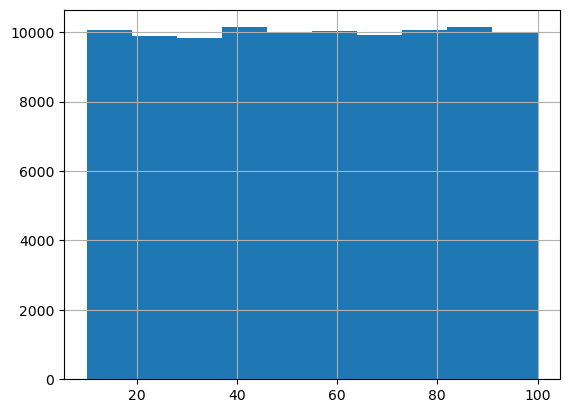

In [20]:
df["Price"].hist()

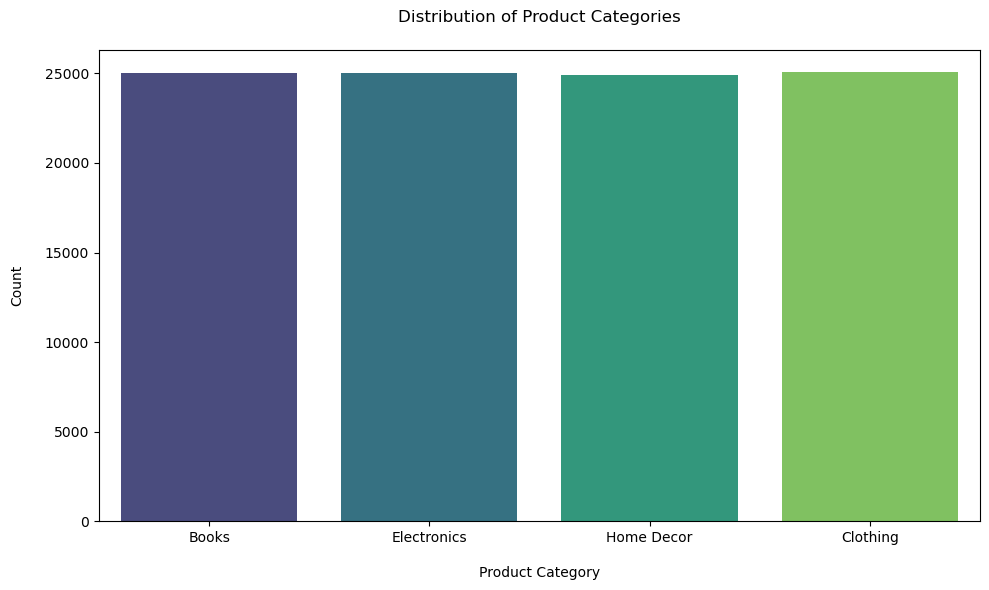

In [21]:
# Plot the distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(x='ProductCategory', data=df, palette='viridis')
plt.title('Distribution of Product Categories', pad=20)
plt.xlabel('Product Category', labelpad=15)
plt.ylabel('Count', labelpad=15)
plt.tight_layout()
plt.show()

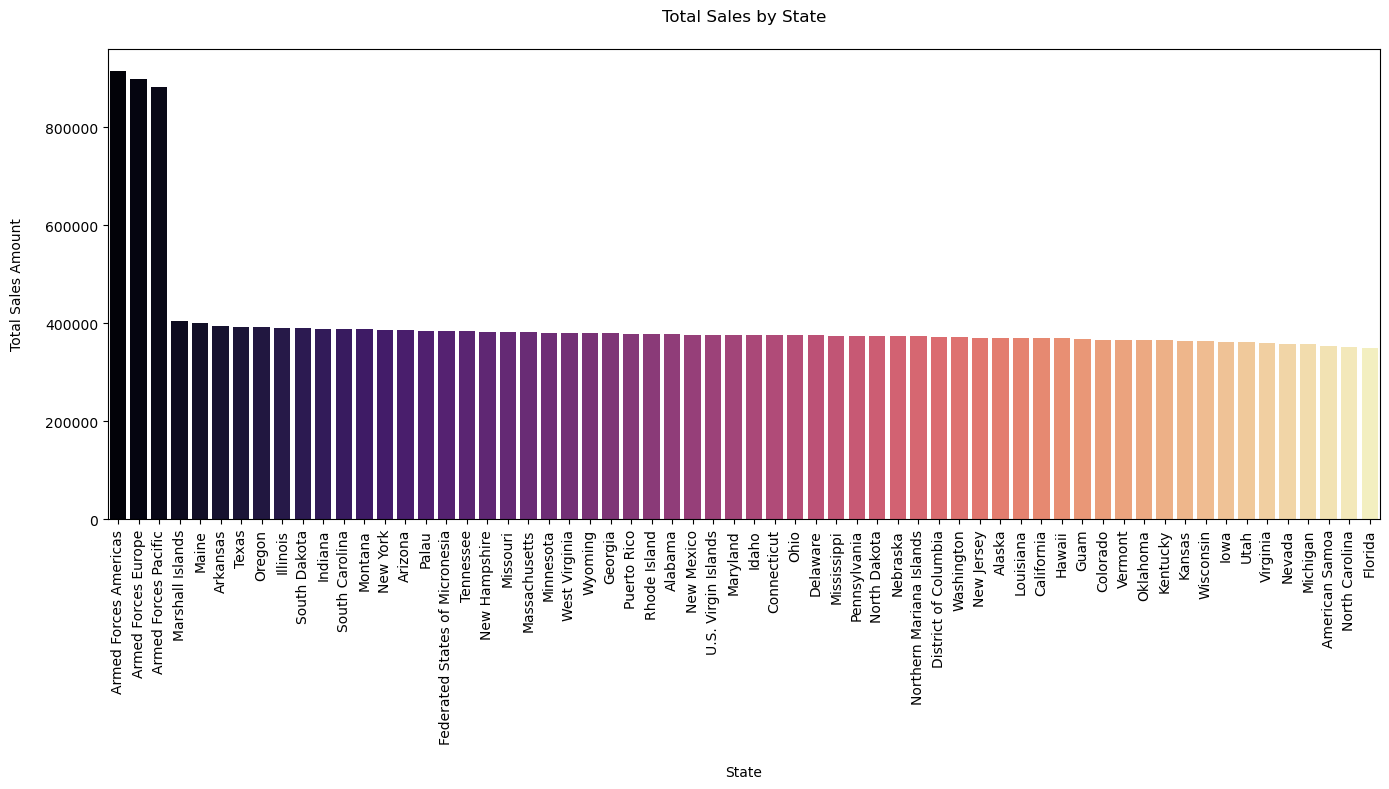

In [22]:
# Plot total sales by state
plt.figure(figsize=(14, 8))
state_sales = df.groupby('State')['TotalAmount'].sum().sort_values(ascending=False)
sns.barplot(x=state_sales.index, y=state_sales.values, palette='magma')
plt.title('Total Sales by State', pad=20)
plt.xlabel('State', labelpad=15)
plt.ylabel('Total Sales Amount', labelpad=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_19940\2888758464.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=monthly_sales_2023.index, y=monthly_sales_2023.values, ax=axes[0], palette='viridis')
C:\Users\PC\AppData\Local\Temp\ipykernel_19940\2888758464.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=monthly_sales_2024.index, y=monthly_sales_2024.values, ax=axes[1], palette='magma')


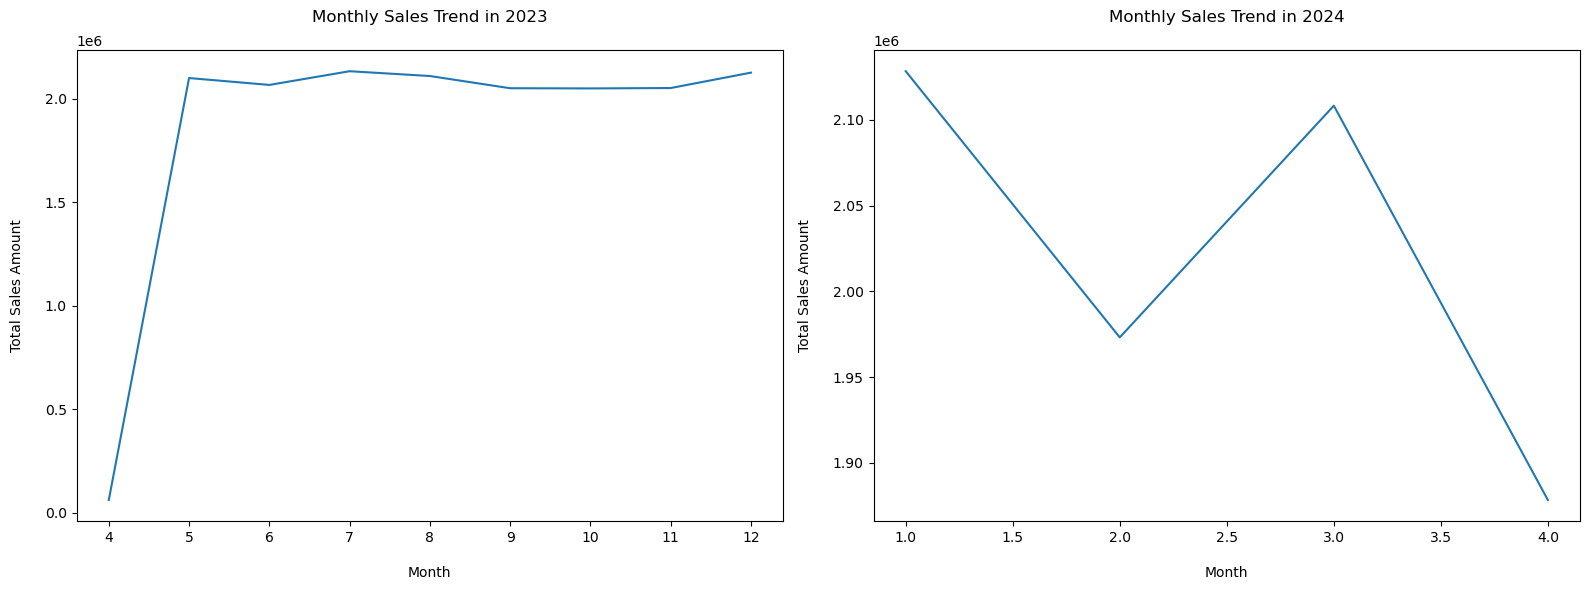

In [23]:
# Plot monthly sales trend for 2023 and 2024 separately
monthly_sales_2023 = df[df['Year'] == 2023].groupby('Month')['TotalAmount'].sum()
monthly_sales_2024 = df[df['Year'] == 2024].groupby('Month')['TotalAmount'].sum()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 2023
sns.lineplot(x=monthly_sales_2023.index, y=monthly_sales_2023.values, ax=axes[0], palette='viridis')
axes[0].set_title('Monthly Sales Trend in 2023', pad=20)
axes[0].set_xlabel('Month', labelpad=15)
axes[0].set_ylabel('Total Sales Amount', labelpad=15)

# Plot for 2024
sns.lineplot(x=monthly_sales_2024.index, y=monthly_sales_2024.values, ax=axes[1], palette='magma')
axes[1].set_title('Monthly Sales Trend in 2024', pad=20)
axes[1].set_xlabel('Month', labelpad=15)
axes[1].set_ylabel('Total Sales Amount', labelpad=15)

plt.tight_layout()
plt.show()

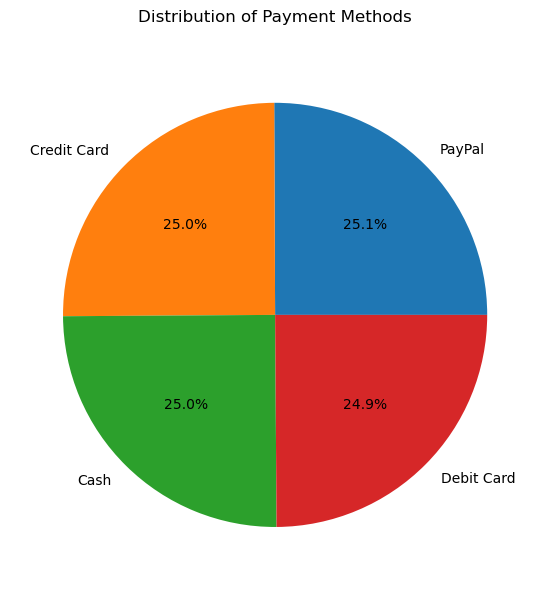

In [24]:
# Plot the distribution of payment methods
fig, ax = plt.subplots(figsize=(10, 6))
df['PaymentMethod'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_title('Distribution of Payment Methods', pad=20)
ax.set_ylabel('')
plt.tight_layout()
plt.show()

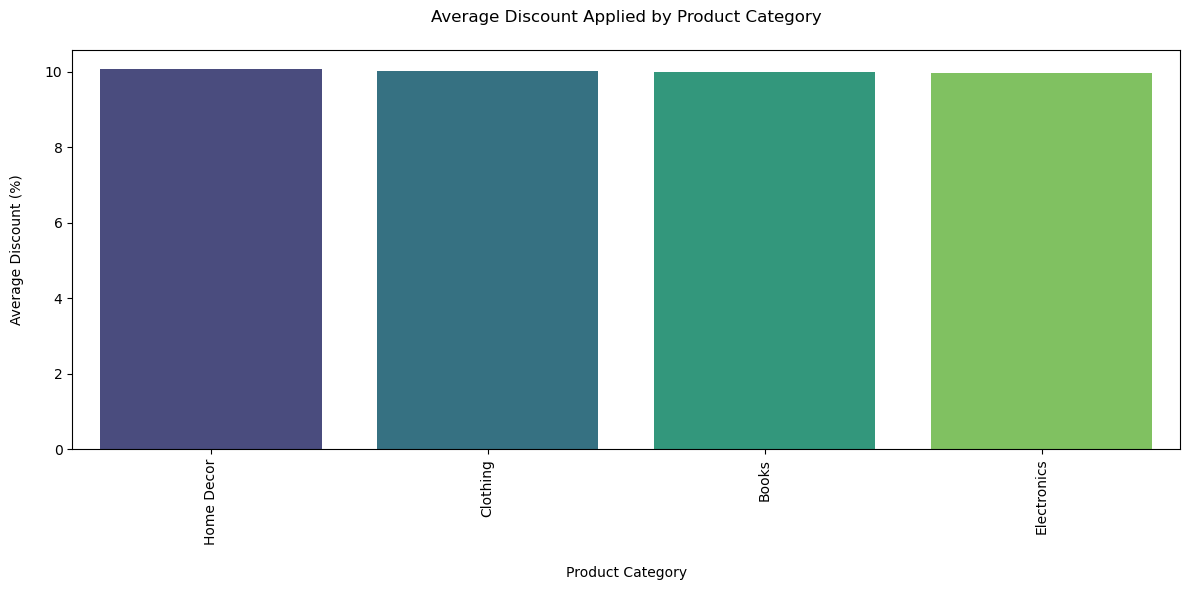

In [25]:
# Plot average discount applied by product category
plt.figure(figsize=(12, 6))
avg_discount = df.groupby('ProductCategory')['DiscountApplied(%)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_discount.index, y=avg_discount.values, palette='viridis')
plt.title('Average Discount Applied by Product Category', pad=20)
plt.xlabel('Product Category', labelpad=15)
plt.ylabel('Average Discount (%)', labelpad=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

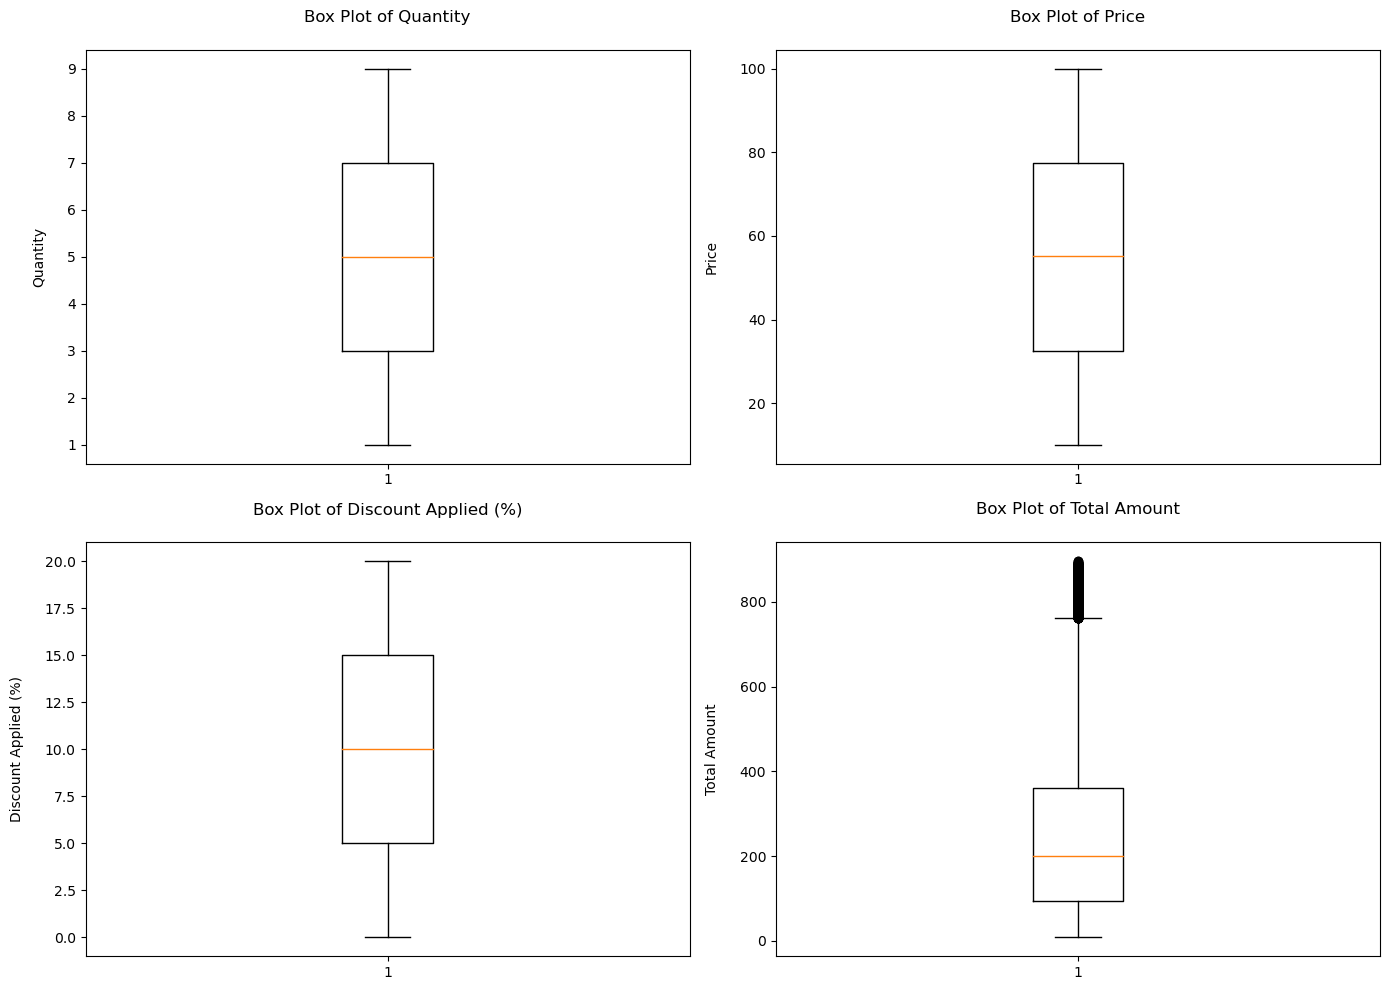

In [26]:
# Plot box plots for numerical columns to identify outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Quantity
axes[0, 0].boxplot(df['Quantity'])
axes[0, 0].set_title('Box Plot of Quantity', pad=20)
axes[0, 0].set_ylabel('Quantity', labelpad=15)

# Price
axes[0, 1].boxplot(df['Price'])
axes[0, 1].set_title('Box Plot of Price', pad=20)
axes[0, 1].set_ylabel('Price', labelpad=15)

# Discount Applied (%)
axes[1, 0].boxplot(df['DiscountApplied(%)'])
axes[1, 0].set_title('Box Plot of Discount Applied (%)', pad=20)
axes[1, 0].set_ylabel('Discount Applied (%)', labelpad=15)

# Total Amount
axes[1, 1].boxplot(df['TotalAmount'])
axes[1, 1].set_title('Box Plot of Total Amount', pad=20)
axes[1, 1].set_ylabel('Total Amount', labelpad=15)

plt.tight_layout()
plt.show()

In [27]:
Q1 = df['TotalAmount'].quantile(0.25)
Q3 = df['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['TotalAmount'] >= lower_bound) & (df['TotalAmount'] <= upper_bound)]

In [28]:
# Cap outliers to the 95th and 5th percentiles
upper_cap = df['TotalAmount'].quantile(0.95)
lower_cap = df['TotalAmount'].quantile(0.05)

df['TotalAmount'] = np.clip(df['TotalAmount'], lower_cap, upper_cap)

In [29]:
# Apply log transformation
df['TotalAmount_log'] = np.log(df['TotalAmount'] + 1)  # Add 1 to avoid log(0)

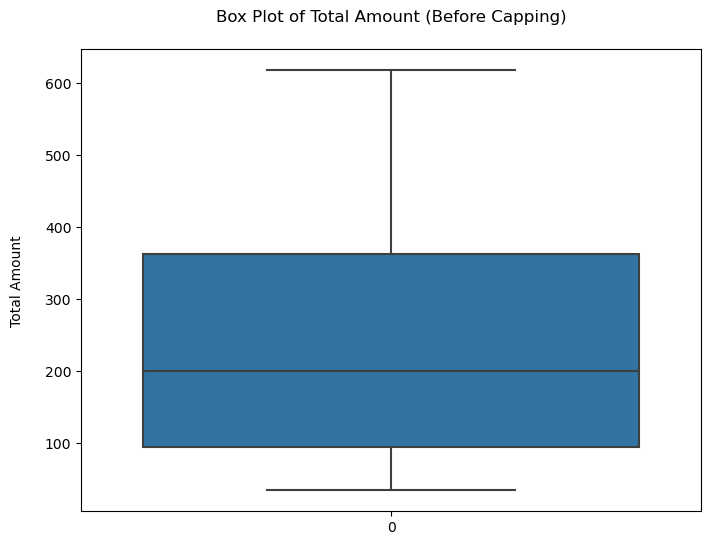

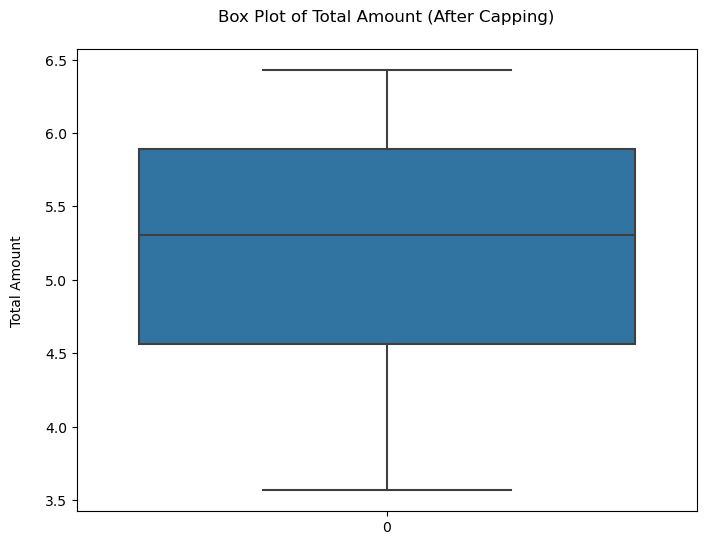

In [30]:
# Before capping
plt.figure(figsize=(8, 6))
sns.boxplot(df['TotalAmount'])
plt.title('Box Plot of Total Amount (Before Capping)', pad=20)
plt.ylabel('Total Amount', labelpad=15)
plt.show()

# After capping
plt.figure(figsize=(8, 6))
sns.boxplot(df['TotalAmount_log'])  # Use the modified DataFrame
plt.title('Box Plot of Total Amount (After Capping)', pad=20)
plt.ylabel('Total Amount', labelpad=15)
plt.show()

In [31]:
df.head()

,ProductID,Quantity,Price,PaymentMethod,ProductCategory,DiscountApplied(%),TotalAmount,Time,Date,Month,Year,State,TotalAmount_log
0,C,7,80.079844,Cash,Books,18.677100,455.862764,12:32:00,26,12,2023,Hawaii,6.124383
48736,B,3,92.678967,Cash,Electronics,19.099321,224.933741,20:23:00,30,4,2023,Kansas,5.420242
48737,B,2,67.162283,Cash,Home Decor,7.110687,124.773166,12:43:00,10,7,2023,California,4.834480
48738,A,3,89.128984,Credit Card,Books,14.559527,228.456676,14:37:00,11,10,2023,Armed Forces Europe,5.435714
48740,D,9,83.951129,PayPal,Clothing,14.666200,617.501140,12:15:00,21,12,2023,Montana,6.427299


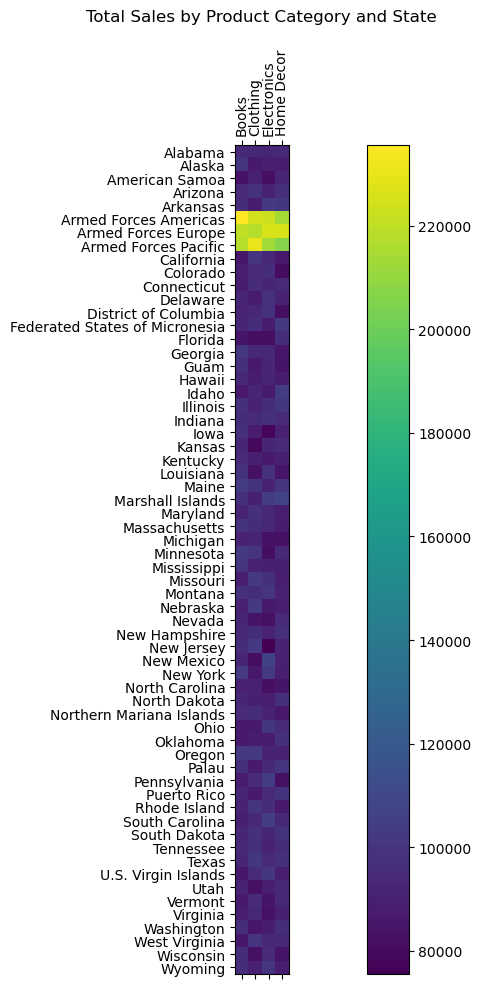

In [32]:
# Pivot table for total sales by product category and state
pivot_table = df.pivot_table(values='TotalAmount', index='ProductCategory', columns='State', aggfunc='sum').T

# Plot heatmap
fig, ax = plt.subplots(figsize=(16, 10))
cax = ax.matshow(pivot_table, cmap='viridis')
fig.colorbar(cax)

ax.set_xticks(range(len(pivot_table.columns)))
ax.set_xticklabels(pivot_table.columns, rotation=90)
ax.set_yticks(range(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)

ax.set_title('Total Sales by Product Category and State', pad=20)
plt.tight_layout()
plt.show()

# **K-means Clustering algorithms**

In [33]:
from sklearn.cluster import KMeans
from copy import deepcopy

In [34]:
# Making a deepcopy for splitting train and test data
df1 = deepcopy(df)

In [35]:
df1.head()

,ProductID,Quantity,Price,PaymentMethod,ProductCategory,DiscountApplied(%),TotalAmount,Time,Date,Month,Year,State,TotalAmount_log
0,C,7,80.079844,Cash,Books,18.677100,455.862764,12:32:00,26,12,2023,Hawaii,6.124383
48736,B,3,92.678967,Cash,Electronics,19.099321,224.933741,20:23:00,30,4,2023,Kansas,5.420242
48737,B,2,67.162283,Cash,Home Decor,7.110687,124.773166,12:43:00,10,7,2023,California,4.834480
48738,A,3,89.128984,Credit Card,Books,14.559527,228.456676,14:37:00,11,10,2023,Armed Forces Europe,5.435714
48740,D,9,83.951129,PayPal,Clothing,14.666200,617.501140,12:15:00,21,12,2023,Montana,6.427299


In [71]:
# Splitting data into X and y to perform K-means Clustering
# preidctors = ['Quantity', 'Price', 'DiscountApplied(%)']
X = df1.iloc[:, [2,6]].values
X

array([[ 80.07984415, 455.8627638 ],
       [ 92.67896702, 224.9337415 ],
       [ 67.16228281, 124.7731664 ],
       ...,
       [ 54.83621264, 104.8627222 ],
       [ 75.7630702 , 617.50113987],
       [ 38.08776628, 184.7903051 ]])

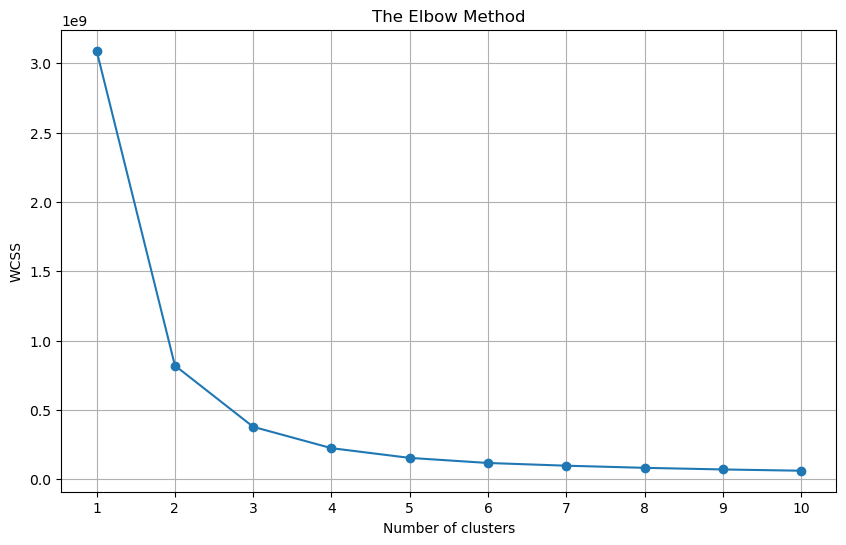

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []
for i in range(1, 11):  # Let's consider 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    max_iter=300, 
                    n_init=10, 
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the results on a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [73]:
kmeans = KMeans(n_clusters = 4,
                    init= 'k-means++',
                    random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [74]:
print(y_kmeans)

[0 3 1 ... 1 2 3]


# **Visualization of customer segments**

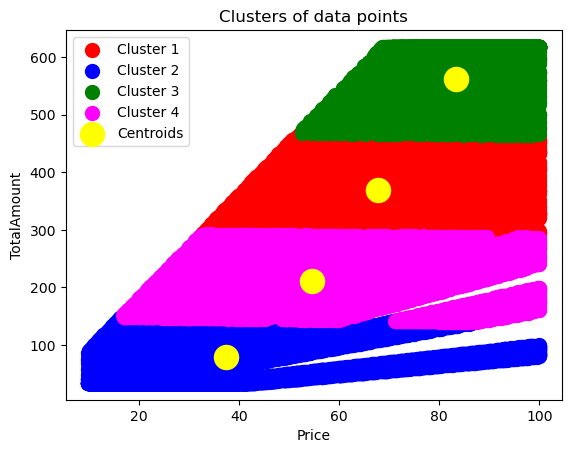

In [77]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='magenta', label='Cluster 4')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of data points')
plt.xlabel('Price')  # Adjust based on your dataset
plt.ylabel('TotalAmount')  # Adjust based on your dataset
plt.legend()
plt.show()